

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report,we will provide a brief introduction to the dataset TMDb movie data I've selected for analysis., This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. At the end of this section, We will make the data analysis process into five steps: Question, Wrangle, Explore, Draw Conclusions, and Communicate the final report with you.
>




In [1]:
# importing statements for all of the packages that i will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='Questions'></a>
### Questions to answer

here-under some of the questions we may ask to explore this big data : 
<ul>
    <li>Which genres are most popular from year to year?</li>
    <li>What kinds of properties are associated with movies that have high revenues?</li>
    <li>Did movies with higher vote count received a better rating?</li>
    <li>Which movie had the highest and lowest profit?</li>
    <li>Which movie had the highest budget?</li>
    <li>What is the average budget of the movie based on Profit of movies making more than 25M Dollars?</li>
    <li>Which are the most frequent cast involved based on Profit of movies making more than 25M Dollars?</li>
</ul>


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will check for cleanliness, and then trim and clean my dataset for analysis.
>



### General Properties

> Let's check the dataset and see what cleaning does it requires.

In [2]:
# Reading a csv file and storing the dataset in pandas dataframe variable df.
df = pd.read_csv('tmdb-movies.csv')
# Printing the first five rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Let us check infomation on datatypes of columns and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

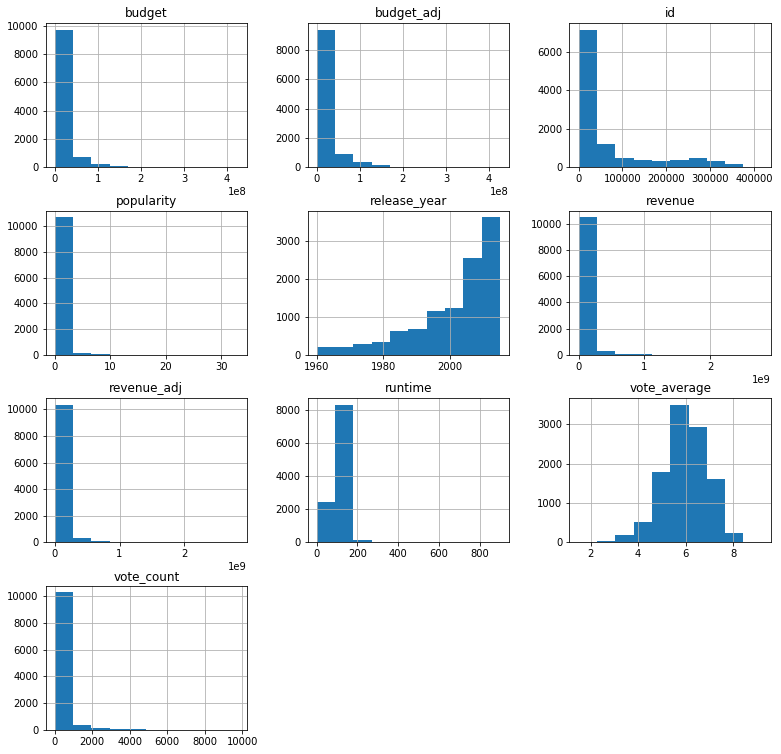

In [4]:
# let see how our data looks like in histogram.
df.hist(figsize=(13,13));

In [5]:
# lets us check some statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Calculate number of duplicated rows.
sum(df.duplicated())

1

### Finding

1- in the csv file , we have columns with large numbers.But when i read the csv file with read_csv() and display the dataframe,those columns (budget_adj ,revenue_adj) are printed in scientific format with exponential ( 1.379999e+08 )(1.392446e+09) . so we need to change it to be numberic numbers.

2- There are plenty of columns indicating a problem. Many rows seems to contain several values, which are seperated by an "|". They need to be cleaned in the first place in order to provide a proper dataset for the intended analysis. The rows containing such values are: CAST , DIRECTOR , GENRES , PRODUCTION_COMPANIES


3- there are columns in the dataset, which are not important to the intended analysis and therefore will be removed  This includes:IMDB_ID , HOMEPAGE , OVERVIEW , RELEASE_DATE , TAGLINE , KEYWORDS. 

4-  some coulmns such as revenue, release_year, etc. have a big amount of available data for the analysis. However, the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue, contain many "0" in their columns. 


### Data Cleaning (Lets us perform all the steps that are discussed above for cleaning)

In this section the before mentioned "0" will be replaced with nan-Values and will be dropped. Then, the rows with several values will be seperated in single columns containing only one value. This is needed in order to perform a proper analysis. Afterwards, unwanted rows for the analysis will be dropped, before the perform general data cleaning action as dropping duplicated lines, correct data types, check duplicated entries in some selected columns etc.

### (1)Changing scientific numbers to numeric numbers


In [7]:
#    https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

In [8]:
# test scientific to numeric numbers
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


### (2) Fixing  0 and NaN
df.info( ) revealed that most columns with important content for the analysis, such as revenue, release_year, etc. have a big amount of available data for the analysis. However, the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, the columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" will change its "0" values into "nan" and the respective colums will be dropped for the analysis.



In [9]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

### (3) Seperating columns with several values, split by an '|', into as many columns as needed.


In [10]:
#source: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

df_director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_production = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking df_g if split was conducted as intended
df_director.head()

,director_1,director_2,director_3,director_4,director_5,director_6
0,Colin Trevorrow,None,None,None,None,None
1,George Miller,None,None,None,None,None
2,Robert Schwentke,None,None,None,None,None
3,J.J. Abrams,None,None,None,None,None
4,James Wan,None,None,None,None,None


### (4) remove duplicates and not needed coulmns.

In [11]:
"""Joining the seperated columns to the original dataframe and
dropping unneeded columns for the analysis"""

df = df.join([df_genres, df_production, df_director])
df = df.drop(['keywords', 'genres', 'director', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)


In [12]:
"""test number of duplicates"""
df.duplicated().sum()

0

In [13]:
"""testing if all rows contain the intended data type"""
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
cast                       object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
genres_1                   object
genres_2                   object
genres_3                   object
genres_4                   object
genres_5                   object
production_companies_1     object
production_companies_2     object
production_companies_3     object
production_companies_4     object
production_companies_5     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
dtype: object

So far the data looks prepared for the analysis, no duplicates have been found, columns containing multiple values have been seperated and data types look ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

>  Now We will  compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1 Which genres are most popular from year to year?

In [14]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
# Adding release year to df_genres
df_genres_dates = df_genres.join(df['release_year'])

In [15]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] # creates a list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Family,Comedy,Not equal
1,1962,Action,Adventure,Not equal
2,1963,Action,Action,Equal
3,1964,Adventure,Adventure,Equal
4,1965,Action,Adventure,Not equal
5,1967,Action,Action,Equal
6,1969,Action,Adventure,Not equal
7,1971,Thriller,Action,Not equal
8,1972,Crime,Drama,Not equal
9,1973,Thriller,Drama,Not equal


In [16]:
df_most_popular['is_equal'].value_counts()

Not equal    40
Equal        11
Name: is_equal, dtype: int64

### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

In [17]:
# Creating a copy of the original DataFrame
df_revenue = df

In [18]:
#Performing basic statistic in order to create 4 classifications of the revenue_adj
df_revenue['revenue_adj'].describe()

count         1287.00
mean     199177499.23
std      296851462.45
min             43.00
25%       27648902.20
50%       86747695.58
75%      235117806.64
max     2827123750.41
Name: revenue_adj, dtype: float64

In [19]:
#Bin_edges correspond to min - max entries in previous cell. Quantiles are lables by bin_names.
#new column 'revenue_level' is created to classify columns based on revenues

bin_edges = [43.00,27648902.20,86747695.58,235117806.64,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [20]:
#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [21]:
#nested dictionary is created with 8 attributes based on revenue_levels

movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        #production companies
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()
        #release_year
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [22]:
#https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionaryuser_ids = []
#transforming nested dictionary into dataframe

movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                               120.02
         frequent_director                Steven Spielberg
         avg_budget                           113245295.36
         avg_vote                                     6.67
         frequent_genres                         Adventure
         release_year                                 2010
         frequent_production_companies        Warner Bros.
medium   avg_duration                               111.11
         frequent_director                    Dennis Dugan
         avg_budget                            57145399.04
         avg_vote                                     6.24
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies  Universal Pictures
low      avg_duration                               107.02
         frequent_director                  John Carpenter
         avg_budget                            31708541.93
         avg_vote                                     6.16
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies  Universal Pictures
very low avg_duration                               102.84
         frequent_director                  John Carpenter
         avg_budget                            16002617.64
         avg_vote                                     6.04
         frequent_genres                             Drama
         release_year                                 2010
         frequent_production_companies        Warner Bros.

In [23]:
df_revenue.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.00,0.19,-0.05,-0.03,-0.01,0.06,0.00,0.49,-0.12,-0.10
popularity,0.19,1.00,0.43,0.59,0.32,0.74,0.36,0.06,0.42,0.55
budget,-0.05,0.43,1.00,0.71,0.34,0.58,0.08,0.18,0.99,0.57
revenue,-0.03,0.59,0.71,1.00,0.37,0.78,0.30,0.03,0.71,0.91
runtime,-0.01,0.32,0.34,0.37,1.00,0.43,0.39,-0.07,0.36,0.37
vote_count,0.06,0.74,0.58,0.78,0.43,1.00,0.46,0.07,0.57,0.70
vote_average,0.00,0.36,0.08,0.30,0.39,0.46,1.00,-0.16,0.09,0.32
release_year,0.49,0.06,0.18,0.03,-0.07,0.07,-0.16,1.00,0.06,-0.23
budget_adj,-0.12,0.42,0.99,0.71,0.36,0.57,0.09,0.06,1.00,0.61
revenue_adj,-0.10,0.55,0.57,0.91,0.37,0.70,0.32,-0.23,0.61,1.00


### Research Question 3:  Did movies with higher vote count received a better rating?

In [24]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

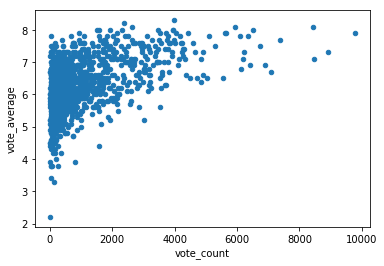

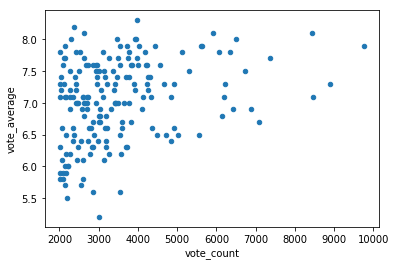

In [25]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [26]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.00,0.46
vote_average,0.46,1.00


In [27]:
 df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.00,0.31
vote_average,0.31,1.00


### Research Question 4: Which movie had the highest and lowest profit?

In [28]:
# To calculate profit, we need to substract the budget from the revenue.
df['profit'] = df['revenue'] - df['budget']
# Lets look at the new dataset
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,vote_count,vote_average,release_year,...,production_companies_4,production_companies_5,director_1,director_2,director_3,director_4,director_5,director_6,revenue_level,profit
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.00,5562,6.50,2015,...,Fuji Television Network,Dentsu,Colin Trevorrow,None,None,None,None,None,high,1363528810.00
1,76341,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.00,6185,7.10,2015,...,None,None,George Miller,None,None,None,None,None,high,228436354.00
2,262500,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.00,2480,6.30,2015,...,NeoReel,None,Robert Schwentke,None,None,None,None,None,high,185238201.00
3,140607,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.00,5292,7.50,2015,...,None,None,J.J. Abrams,None,None,None,None,None,high,1868178225.00
4,168259,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.00,2947,7.30,2015,...,Dentsu,One Race Films,James Wan,None,None,None,None,None,high,1316249360.00


In [29]:
# Movie with highest profit
df.loc[df['profit'].idxmax()]

id                                                                    19995
popularity                                                             9.43
budget                                                         237000000.00
revenue                                                       2781505847.00
original_title                                                       Avatar
cast                      Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                              162.00
vote_count                                                             8458
vote_average                                                           7.10
release_year                                                           2009
budget_adj                                                     240886902.89
revenue_adj                                                   2827123750.41
genres_1                                                             Action
genres_2    

In [30]:
# Movie with lowest profit
df.loc[df['profit'].idxmin()]

id                                                                    46528
popularity                                                             0.25
budget                                                         425000000.00
revenue                                                         11087569.00
original_title                                            The Warrior's Way
cast                      Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                              100.00
vote_count                                                               74
vote_average                                                           6.40
release_year                                                           2010
budget_adj                                                     425000000.00
revenue_adj                                                     11087569.00
genres_1                                                          Adventure
genres_2    

> #### Which movie had the highest and lowest profit?
> Highest :: Avatar with profit of 2544505847 dollars
>
> Lowest :: The Warrior's Way with profit of -413912431 dollars

### Research Question 5 : Which movie had the highest budget?

In [31]:
# Movie with highest budget
df.loc[df['budget'].idxmax()]

id                                                                    46528
popularity                                                             0.25
budget                                                         425000000.00
revenue                                                         11087569.00
original_title                                            The Warrior's Way
cast                      Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                              100.00
vote_count                                                               74
vote_average                                                           6.40
release_year                                                           2010
budget_adj                                                     425000000.00
revenue_adj                                                     11087569.00
genres_1                                                          Adventure
genres_2    

> #### Which movie had the highest budget?
> The Highest movie is The Warrior's Way with budget of 425000000 dollars
>
> Let us check if there a relation between the Budget and Profit

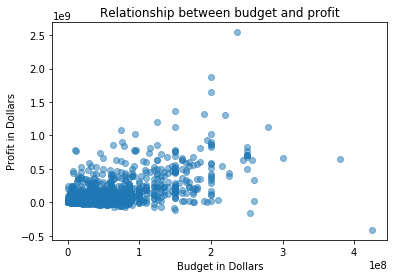

In [32]:
# x-axis
plt.xlabel('Budget in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between budget and profit')
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.show()

>> We can see that there no as such relationship between budget and profits, But yes there are very less flims which didnt make profit when the budget was greater then 20M Dollar.

### Research Question 6 : What is the average budget of the movie based on Profit of movies making more than 25M Dollars?

In [33]:
# Dataframe which has data of movies which made profit of more the 25M Dollars.
df_profit_data = df[df['profit'] >= 25000000]
# Reindexing the dataframe
df_profit_data.index = range(len(df_profit_data))
#showing the dataset
df_profit_data.head()

,id,popularity,budget,revenue,original_title,cast,runtime,vote_count,vote_average,release_year,...,production_companies_4,production_companies_5,director_1,director_2,director_3,director_4,director_5,director_6,revenue_level,profit
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.00,5562,6.50,2015,...,Fuji Television Network,Dentsu,Colin Trevorrow,None,None,None,None,None,high,1363528810.00
1,76341,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.00,6185,7.10,2015,...,None,None,George Miller,None,None,None,None,None,high,228436354.00
2,262500,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.00,2480,6.30,2015,...,NeoReel,None,Robert Schwentke,None,None,None,None,None,high,185238201.00
3,140607,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.00,5292,7.50,2015,...,None,None,J.J. Abrams,None,None,None,None,None,high,1868178225.00
4,168259,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.00,2947,7.30,2015,...,Dentsu,One Race Films,James Wan,None,None,None,None,None,high,1316249360.00


In [34]:
# Printing the info of the new dataframe
df_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 30 columns):
id                        767 non-null int64
popularity                767 non-null float64
budget                    767 non-null float64
revenue                   767 non-null float64
original_title            767 non-null object
cast                      767 non-null object
runtime                   767 non-null float64
vote_count                767 non-null int64
vote_average              767 non-null float64
release_year              767 non-null int64
budget_adj                767 non-null float64
revenue_adj               767 non-null float64
genres_1                  767 non-null object
genres_2                  659 non-null object
genres_3                  455 non-null object
genres_4                  164 non-null object
genres_5                  50 non-null object
production_companies_1    767 non-null object
production_companies_2    666 non-null object
production_compani

In [35]:
# Finfd the average budget of movies which made profit more then 25M Dollars
df_profit_data['budget'].mean()

67565313.81747067

> #### What is the average budget of the movie based on Profit of movies making more then 25M Dollars?
> So the average budget of the movies is 67565313.81 Dollars

### Research Question 7 : Which are the most frequent cast involved based on Profit of movies making more than 25M Dollars?

In [36]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
cast_count = pd.Series(df_profit_data['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Mark Wahlberg         16
Matt Damon            16
Anne Hathaway         14
Cameron Diaz          13
Brad Pitt             12
Tom Hanks             12
Samuel L. Jackson     12
George Clooney        11
Liam Neeson           11
Ralph Fiennes         11
James Franco          11
Scarlett Johansson    11
Johnny Depp           11
Robert Downey Jr.     11
Dwayne Johnson        11
Seth Rogen            11
Tom Cruise            11
Jason Bateman         10
Michael Caine         10
Hugh Jackman          10
dtype: int64

> #### Which are the most frequent cast involved based on Profit of movies making more then 25M Dollars?
> So the Top 5 cast are Mark Wahlberg, Matt Damon, Anne Hathaway , Cameron Diaz, Samuel L. Jackson
>
> Lets visualize this with a plot

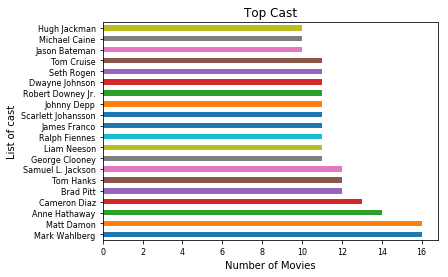

In [37]:
# Initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize = 8)
# Set a title
diagram.set(title = 'Top Cast')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of cast')
# Show the plot
plt.show()

> We can clearly see in the visualization that most movies have Mark Wahlberg as a cast which tends to higher profit.

<a id='conclusions'></a>
## Conclusions

> Finally, we reaches the final step conclusions that will summarize our findings and the results that have been performed. 

>>The first research question "Which genres are most popular from year to year?" has shown surprising results, as the most popular genre differed a lot. To the authors surprise, only in 11 occasions the most frequent produced genres was also voted as best genre by the users. In all remaining 40 occasions the two values differed.

>>>The second research question "What kinds of properties are associated with movies that have high revenues?" shows interesting result. The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon.

>>>>The third research question "Did movies with higher vote count received a better rating?" does not indicate that movies with a higher vote_count receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the corralation does not indicate that higher vote counts result in higher vote averages. 

>>>>> The forth research question the movie had the highest and lowest profit is Avatar with profit of 2544505847 dollars and the Lowest is The Warrior's Way with profit of -413912431 dollars.

>>>>>> The fifth research question of Which movie had the highest budget is The Warrior's Way with budget of 425000000 dollars . 

>>>>>>> The sixth research questiont is the average budget of the movie based on Profit of movies making more then 25M Dollars is the average budget of the movies is 67565313.81 Dollars

>>>>>>>> the last but not least question is Which are the most frequent cast involved based on Profit of movies making more then 25M Dollars? and the Top 5 cast are Mark Wahlberg, Matt Damon, Anne Hathaway , Cameron Diaz, Samuel L. Jackson



In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0